In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
opti_df = pd.read_hdf('../experiments/dtown_rnd_db.h5', 'results')
# ----- ----- ----- ----- -----
# TSTSPLIT
# ----- ----- ----- ----- -----
opti_df = opti_df.loc[:99]
# ----- ----- ----- ----- -----
#hist_files = [f for f in glob.glob('../experiments/history/dtownRRR*')]
hist_files = ['../experiments/history/dtownRRR2_vld.h5',
              '../experiments/history/dtownRRR3_vld.h5',
              '../experiments/history/dtownRRR4_vld.h5']
subdfs = dict()
for file in hist_files:
    subdfs[file[23:-3]] = pd.read_hdf(file)
dqn_df = pd.concat(subdfs.values(), axis=1, keys=subdfs.keys())
idx = pd.IndexSlice

In [3]:
print(opti_df['nm']['reward'].mean())
print(opti_df['de']['reward'].mean())
print(opti_df['pso']['reward'].mean())
print(opti_df['oneshot']['reward'].mean())

0.6568652119897032
0.673362909533985
0.6702075952053331
0.6095226720540422


In [4]:
opti_algo = 'oneshot'
dqn_df.head(3)

dtownRRR2_vld                                             \
                    lastReward bestReward worstReward nFail nBump nSiesta   
step_id scene_id                                                            
60000   0             0.675479   0.680274    0.656868   0.0   0.0     0.0   
        1             0.685029   0.685029    0.595396   0.0   0.0     0.0   
        2             0.668827   0.668827    0.588451   0.0   0.0     0.0   

                                                                   ...  \
                  nStep explorationFactor speedOfGrp0 speedOfGrp1  ...   
step_id scene_id                                                   ...   
60000   0         200.0          0.957895        1.20        0.90  ...   
        1         200.0          0.957895        0.95        0.85  ...   
        2         200.0          0.957895        0.85        0.85  ...   

                 dtownRRR4_vld                                         \
                         nFail nBump nSiesta  nStep explorationFactor   
step_id scene_id                                                        
60000   0                  0.0   0.0     0.0  200.0          0.957895   
        1                  0.0   0.0     0.0  200.0          0.957895   
        2                  0.0   0.0     0.0  200.0          0.957895   

                                                                              
                 speedOfGrp0 speedOfGrp1 speedOfGrp2 speedOfGrp3 speedOfGrp4  
step_id scene_id                                                              
60000   0               1.20        0.85        0.95        0.95        0.95  
        1               0.80        0.85        0.90        1.05        1.00  
        2               1.15        0.85        0.90        1.00        1.05  

[3 rows x 39 columns]

### utolsó jutalom / legnagyobb jutalom

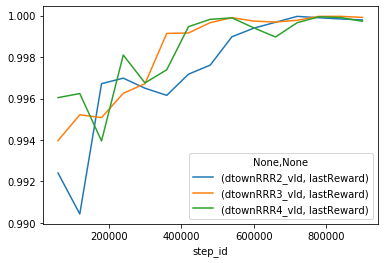

In [5]:
ratio = dqn_df.loc[idx[:,:], idx[:,'lastReward']] / dqn_df.loc[idx[:,:], idx[:,'bestReward']].values
mean_ratio = ratio.astype(float).groupby(level=0).mean()
mean_ratio.plot()

### utolsó jutalom / opti jutalom

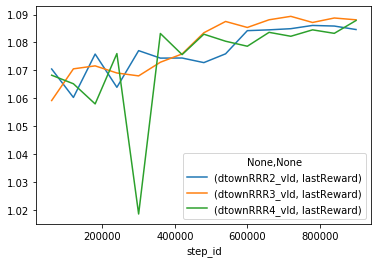

In [6]:
agent_rewards = dqn_df.loc[idx[:,:], idx[:,'lastReward']]
opti_rewards = opti_df[opti_algo]['reward']
length_multiplier = agent_rewards.index.get_level_values(0).nunique()

agent_rewards.index

opti_rewards_ss = pd.Series(np.tile(opti_rewards.values, length_multiplier), index=agent_rewards.index)
mean_ratio = agent_rewards.div(opti_rewards_ss, axis=0).replace([np.inf, -np.inf], np.nan).dropna()
mean_ratio = mean_ratio.groupby(level=0).mean()
mean_ratio.plot()

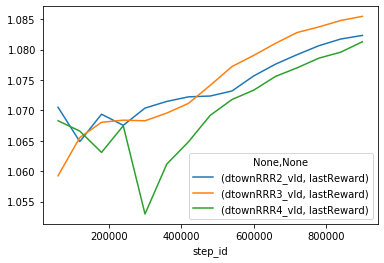

In [7]:
mean_ratio.ewm(alpha=.2).mean().plot()

### közelítőleg jó beállítások aránya

In [8]:
agent_speeds = dqn_df.filter(regex="speedOfGrp*")
new_keys = agent_speeds.keys().levels[0]
length_multiplier = agent_speeds.index.get_level_values(0).nunique()
opti_speeds = opti_df[opti_algo].filter(regex='speedOfGrp*')
opti_speeds = pd.concat([opti_speeds]*length_multiplier, axis=0, keys=agent_speeds.index.levels[0])
opti_speeds = pd.concat([opti_speeds]*len(new_keys), axis=1, keys=new_keys)

close_enough = ((agent_speeds - opti_speeds).abs()<0.05).astype(float)

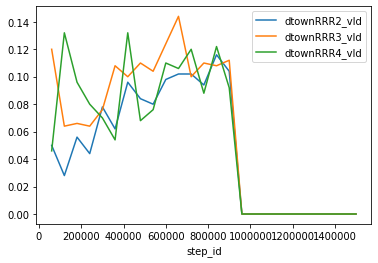

In [9]:
close_enough.groupby(axis=0, level=0).mean().groupby(axis=1, level=0).mean().plot()

### hibás beállítások aránya

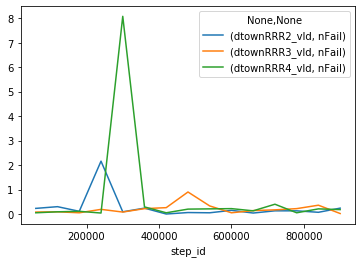

In [10]:
failures = dqn_df.loc[idx[:,:], idx[:,'nFail']]
failures.groupby(level=0).mean().plot()

### kitörési próbálkozások aránya

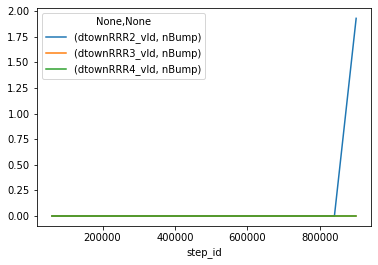

In [11]:
bumps = dqn_df.loc[idx[:,:], idx[:,'nBump']]
bumps.groupby(level=0).mean().plot()

### szieszták aránya

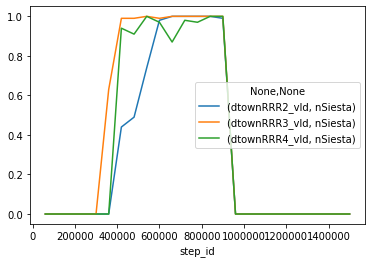

In [12]:
siestas = (dqn_df.loc[idx[:,:], idx[:,'nSiesta']] == 3).astype(float)
siestas.groupby(level=0).mean().plot()

### lépések száma epizódonként

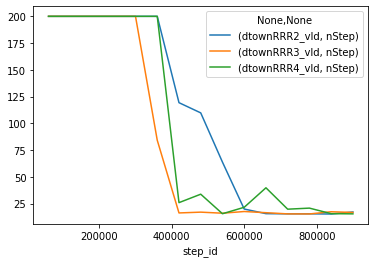

In [13]:
steps = dqn_df.loc[idx[:,:], idx[:,'nStep']]
steps.groupby(level=0).mean().plot()

In [14]:
opti_df.loc[idx[:], idx['de',:]].head(1)

de                                                                  
     reward evals speedOfGrp0 speedOfGrp1 speedOfGrp2 speedOfGrp3 speedOfGrp4
0  0.693003   600         1.2     0.82447    0.931684    0.940188    0.925893